In [83]:
import cv2
import matplotlib.pyplot as plt
import imgaug.augmenters as aug
import random
import shutil
import os
import time
import numpy as np
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import load_model
from google.colab import drive

In [84]:
from keras.callbacks import ModelCheckpoint

In [85]:
from google.colab import drive
drive.mount('/content/drive')


#https://drive.google.com/drive/folders/1iACHvf6Oy3uK-stV9sfKLhZqMP4XHyRA?usp=share_link

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    rescale = 1. / 255,
    zoom_range = 0.2
    )

test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets_Model_Sampah/train',
    target_size = (150, 150),
    batch_size = 32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Datasets_Model_Sampah/val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 450 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [87]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('accuracy') > 0.999999999):
      print('\nAkurasi sudah bagus')
      self.model.stop_training = True
callbacks = myCallback()

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 64)      

In [89]:
model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [90]:
history = model.fit(train_generator,
                    steps_per_epoch=6,
                    epochs=15,
                    #callbacks = [callbacks],
                    validation_data=validation_generator
                    )

Epoch 1/15
6/6 [==============================] - 5s 661ms/step - loss: 0.5735 - accuracy: 0.6875 - val_loss: 0.3455 - val_accuracy: 0.8600
Epoch 2/15
6/6 [==============================] - 3s 525ms/step - loss: 0.4419 - accuracy: 0.8086 - val_loss: 0.1578 - val_accuracy: 0.9800
Epoch 3/15
6/6 [==============================] - 4s 619ms/step - loss: 0.2617 - accuracy: 0.8704 - val_loss: 0.0497 - val_accuracy: 1.0000
Epoch 4/15
6/6 [==============================] - 4s 610ms/step - loss: 0.1918 - accuracy: 0.9323 - val_loss: 0.2261 - val_accuracy: 0.8800
Epoch 5/15
6/6 [==============================] - 4s 587ms/step - loss: 0.1306 - accuracy: 0.9688 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 6/15
6/6 [==============================] - 5s 669ms/step - loss: 0.0443 - accuracy: 0.9948 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/15
6/6 [==============================] - 3s 520ms/step - loss: 0.0292 - accuracy: 0.9938 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 8/15
6/6 [====

In [91]:
epoch_avg_acc = sum(history.history['accuracy']) / len(history.history['accuracy'])
print("Epoch average accuracy: {:.2f}%".format(epoch_avg_acc * 100))

Epoch average accuracy: 95.04%


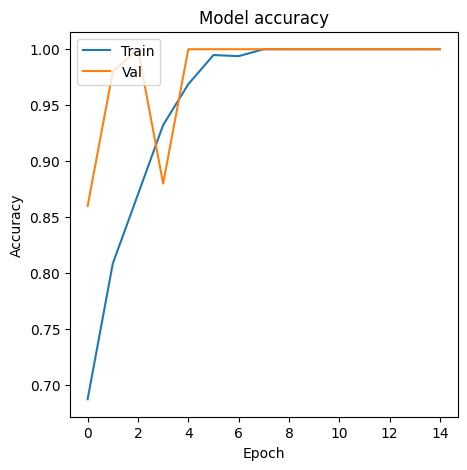

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

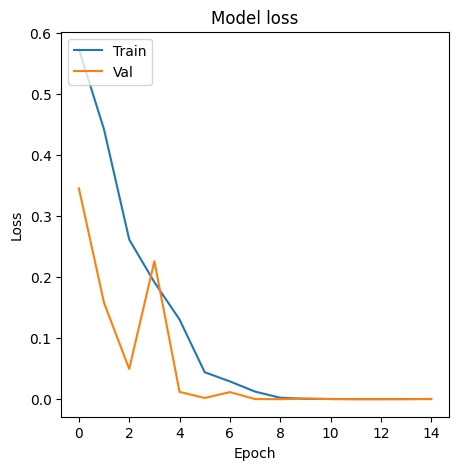

In [93]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [94]:
folder_save = '/content/drive/MyDrive/save_model_sampah'

In [95]:
tf_format = ModelCheckpoint(folder_save)

In [96]:
keras_save = '/content/drive/MyDrive/save_model_sampah.h5'

In [97]:
k_format = ModelCheckpoint(keras_save)

In [98]:
from keras.models import load_model

In [99]:
model.save('/content/drive/MyDrive/save_model_sampah_1.h5')